In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, v_measure_score

In [28]:
dia = pd.read_csv('Dia pronostico.csv')[84:204]
dia['K = 1'] = [0]*120
dia['K = 3'] = [0]*120
dia['K = 6'] = [0]*120
dia['K = 12'] = [0]*120
dia

,Fecha,Potencia [kW],Insolacion [W/m2],K = 1,K = 3,K = 6,K = 12
84,7:00,3.18,79.70,0,0,0,0
85,7:05,3.83,105.06,0,0,0,0
86,7:10,4.06,102.37,0,0,0,0
87,7:15,5.86,147.70,0,0,0,0
88,7:20,11.84,373.12,0,0,0,0
...,...,...,...,...,...,...,...
199,16:35,5.05,94.71,0,0,0,0
200,16:40,4.34,84.98,0,0,0,0
201,16:45,4.06,75.59,0,0,0,0
202,16:50,4.24,65.45,0,0,0,0


In [30]:
for i in range(72+12,216-12):
    if i == 72+12: 
        dia['K = 1'][i] = None
    else:
        dia['K = 1'][i] =dia['Potencia [kW]'][i-1]

for i in range(72+12,216-12):
    if i <= 74+12: 
        dia['K = 3'][i] = None
    else:
        dia['K = 3'][i] =dia['Potencia [kW]'][i-3]
        
for i in range(72+12,216-12):
    if i <= 77+12: 
        dia['K = 6'][i] = None
    else:
        dia['K = 6'][i] =dia['Potencia [kW]'][i-6]

for i in range(72+12,216-12):
    if i <= 83+12: 
        dia['K = 12'][i] = None
    else:
        dia['K = 12'][i] =dia['Potencia [kW]'][i-12]

try:
    dia = dia.drop('Insolacion [W/m2]',axis = 1)
except:
    pass
dia = dia[1:]

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

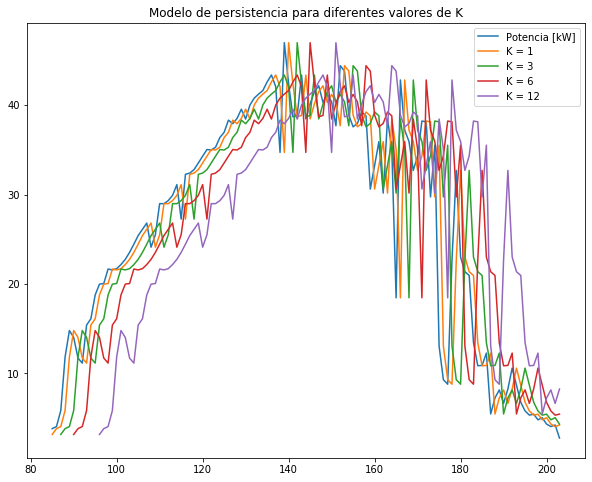

In [31]:
dia.plot(figsize=(10,8),title = 'Modelo de persistencia para diferentes valores de K')

In [32]:
error1 = np.sqrt(mean_squared_error(dia['Potencia [kW]'],dia['K = 1']))
error3 = np.sqrt(mean_squared_error(dia['Potencia [kW]'][75+12:],dia['K = 3'][75+12:]))
error6 = np.sqrt(mean_squared_error(dia['Potencia [kW]'][78+12:],dia['K = 6'][78+12:]))
error12 = np.sqrt(mean_squared_error(dia['Potencia [kW]'][84+12:],dia['K = 12'][84+12:]))

In [33]:
print('El RMSE de persistencia 1 es:' ,error1, '\n'
      'El RMSE de persistencia 3 es:' ,error3, '\n'
      'El RMSE de persistencia 6 es:' ,error6, '\n'
      'El RMSE de persistencia 12 es:', error12, '\n')

El RMSE de persistencia 1 es: 4.865415939969322 
El RMSE de persistencia 3 es: 10.035154613906055 
El RMSE de persistencia 6 es: 11.486849602615308 
El RMSE de persistencia 12 es: 13.561577277767862 



In [34]:
mae1 = mean_absolute_error(dia['Potencia [kW]'],dia['K = 1'])
mae3 = mean_absolute_error(dia['Potencia [kW]'][75+12:],dia['K = 3'][75+12:])
mae6 = mean_absolute_error(dia['Potencia [kW]'][78+12:],dia['K = 6'][78+12:])
mae12 = mean_absolute_error(dia['Potencia [kW]'][84+12:],dia['K = 12'][84+12:])

In [35]:
print('El RMSE de persistencia 1 es:' ,mae1, '\n'
      'El RMSE de persistencia 3 es:' ,mae3, '\n'
      'El RMSE de persistencia 6 es:' ,mae6, '\n'
      'El RMSE de persistencia 12 es:',mae12, '\n')

El RMSE de persistencia 1 es: 2.755126050420168 
El RMSE de persistencia 3 es: 6.6521875 
El RMSE de persistencia 6 es: 8.44862068965517 
El RMSE de persistencia 12 es: 10.882173913043477 



## Volatilidad

15.59497185962587

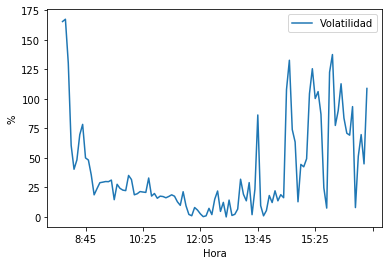

In [87]:
volat = np.absolute(np.log(dia['Potencia [kW]']).diff(12))
volat_df = pd.DataFrame({'Hora':dia.index,'Volatilidad':volat*100})
try:
    volat_df.set_index('Hora',inplace = True)
except:
    pass
volat_df.plot()
plt.ylabel('%')
np.var(volat)*100

Text(0, 0.5, 'Potencia [kW]')

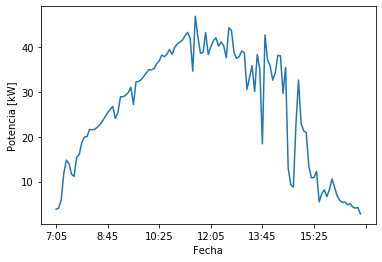

In [84]:
dia['Potencia [kW]'].plot()
plt.ylabel('Potencia [kW]')

In [74]:
dia.head(14)

,Fecha,Potencia [kW],K = 1,K = 3,K = 6,K = 12
85,7:05,3.83,3.18,NaN,NaN,NaN
86,7:10,4.06,3.83,NaN,NaN,NaN
87,7:15,5.86,4.06,3.18,NaN,NaN
88,7:20,11.84,5.86,3.83,NaN,NaN
89,7:25,14.80,11.84,4.06,NaN,NaN
90,7:30,14.03,14.80,5.86,3.18,NaN
91,7:35,11.72,14.03,11.84,3.83,NaN
92,7:40,11.16,11.72,14.80,4.06,NaN
93,7:45,15.41,11.16,14.03,5.86,NaN
94,7:50,16.12,15.41,11.72,11.84,NaN


In [70]:
N = len(dia['Potencia [kW]'])
mape = np.array([0.0]*4)
#dia['K = 1']
error1 = []

for i in range(85,204):
    error1.append(np.abs(dia['Potencia [kW]'][i]-dia['K = 1'][i])/dia['Potencia [kW]'][i])

mape[0] = sum(error1)/N*100
mape

array([14.08646909,  0.        ,  0.        ,  0.        ])

In [72]:
error3 = []
for i in range(87,204):
    error3.append(np.abs(dia['Potencia [kW]'][i]-dia['K = 3'][i])/dia['Potencia [kW]'][i])
mape[1] =  sum(error3)/N*100
mape

array([14.08646909, 24.4862743 ,  0.        ,  0.        ])

In [75]:
error6 = []
for i in range(90,204):
    error6.append(np.abs(dia['Potencia [kW]'][i]-dia['K = 6'][i])/dia['Potencia [kW]'][i])
mape[2] =  sum(error6)/N*100
mape

array([14.08646909, 24.4862743 , 33.73270954,  0.        ])

In [77]:
error12 = []
for i in range(96,204):
    error12.append(np.abs(dia['Potencia [kW]'][i]-dia['K = 12'][i])/dia['Potencia [kW]'][i])
mape[3] =  sum(error12)/N*100
mape

array([14.08646909, 24.4862743 , 33.73270954, 46.6481965 ])

In [78]:
for i in range(4):
    print('El mape para k =',i,'es:',mape[i])

El mape para k = 0 es: 14.086469085705708
El mape para k = 1 es: 24.48627429522582
El mape para k = 2 es: 33.73270954209821
El mape para k = 3 es: 46.64819649835333
